# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

from keras.layers import Conv2D,MaxPooling2D

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path_train = "/content/drive/My Drive/Datasets/emnist-balanced-train.csv"
path_test = "/content/drive/My Drive/Datasets/emnist-balanced-test.csv"

In [0]:
train = pd.read_csv(path_train,header=None)
test  = pd.read_csv(path_test,header=None)

In [0]:
train_data = train.iloc[:, 1:]
train_labels = train.iloc[:, 0]
test_data = test.iloc[:, 1:]
test_labels = test.iloc[:, 0]

In [0]:
train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)
train_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
train_data = train_data.values
train_labels = train_labels.values
test_data = test_data.values
test_labels = test_labels.values
del train, test

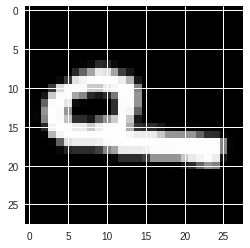

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_data[45].reshape([28, 28]), cmap='Greys_r')
plt.show()

In [0]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image.reshape([28 * 28])
train_data = np.apply_along_axis(rotate, 1, train_data)/255
test_data = np.apply_along_axis(rotate, 1, test_data)/255

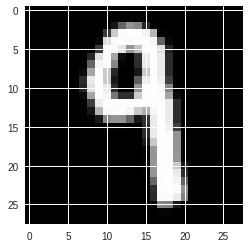

In [0]:
plt.imshow(train_data[45].reshape([28, 28]), cmap='Greys_r')
plt.show()

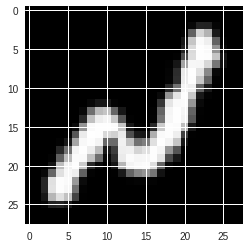

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_data[345].reshape([28, 28]), cmap='Greys_r')
plt.show()

In [0]:
X_train = train_data 
Y_train = train_labels 
X_test = test_data 
Y_test = test_labels 

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
from keras.layers import Activation , MaxPooling2D

model = Sequential()

model.add(Convolution2D(32,3,3,activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(16,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24,3,3,activation='relu'))
model.add(Convolution2D(16,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.27))
model.add(Flatten())
model.add(Dropout(0.27))
model.add(Dense(47, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 24)        3480      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          3472      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 16)          0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])

In [0]:
gen = datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)  

train_generator = gen.flow(X_train, Y_train, batch_size=64)

In [0]:
model.fit_generator(train_generator, steps_per_epoch=697931//64, epochs=15, 
                    validation_data=(X_test,Y_test))

Epoch 1/15
10905/10905 [==============================] - 306s 28ms/step - loss: 0.6792 - acc: 0.7813 - val_loss: 0.3879 - val_acc: 0.8667
Epoch 2/15
10905/10905 [==============================] - 308s 28ms/step - loss: 0.6343 - acc: 0.7952 - val_loss: 0.3728 - val_acc: 0.8724
Epoch 3/15
10905/10905 [==============================] - 310s 28ms/step - loss: 0.6166 - acc: 0.7998 - val_loss: 0.3873 - val_acc: 0.8703
Epoch 4/15
10905/10905 [==============================] - 299s 27ms/step - loss: 0.6010 - acc: 0.8045 - val_loss: 0.3798 - val_acc: 0.8693
Epoch 5/15
10905/10905 [==============================] - 303s 28ms/step - loss: 0.5907 - acc: 0.8070 - val_loss: 0.3924 - val_acc: 0.8695
Epoch 6/15
10905/10905 [==============================] - 303s 28ms/step - loss: 0.5810 - acc: 0.8092 - val_loss: 0.3904 - val_acc: 0.8680
Epoch 7/15
10905/10905 [==============================] - 301s 28ms/step - loss: 0.5770 - acc: 0.8109 - val_loss: 0.3987 - val_acc: 0.8663
Epoch 8/15
10905/10905 [===

In [0]:
model.fit(X_train,Y_train,batch_size=32,epochs=15,verbose=1,validation_data=(X_test, Y_test))

Train on 112800 samples, validate on 18800 samples
Epoch 1/15
112800/112800 [==============================] - 38s 338us/step - loss: 2.3865 - acc: 0.3558 - val_loss: 0.9215 - val_acc: 0.7301
Epoch 2/15
112800/112800 [==============================] - 34s 304us/step - loss: 1.0509 - acc: 0.6786 - val_loss: 0.6646 - val_acc: 0.7903
Epoch 3/15
112800/112800 [==============================] - 34s 303us/step - loss: 0.8528 - acc: 0.7334 - val_loss: 0.5922 - val_acc: 0.8079
Epoch 4/15
112800/112800 [==============================] - 34s 304us/step - loss: 0.7710 - acc: 0.7550 - val_loss: 0.5438 - val_acc: 0.8232
Epoch 5/15
112800/112800 [==============================] - 34s 305us/step - loss: 0.7200 - acc: 0.7690 - val_loss: 0.5161 - val_acc: 0.8332
Epoch 6/15
112800/112800 [==============================] - 34s 302us/step - loss: 0.6780 - acc: 0.7812 - val_loss: 0.5041 - val_acc: 0.8360
Epoch 7/15
112800/112800 [==============================] - 34s 305us/step - loss: 0.6538 - acc: 0.7879

In [0]:
model.fit(X_train,Y_train,batch_size=32,epochs=50,verbose=1,validation_data=(X_test, Y_test))

Train on 112800 samples, validate on 18800 samples
Epoch 1/50
112800/112800 [==============================] - 34s 304us/step - loss: 0.5448 - acc: 0.8187 - val_loss: 0.4192 - val_acc: 0.8602
Epoch 2/50
112800/112800 [==============================] - 35s 307us/step - loss: 0.5404 - acc: 0.8218 - val_loss: 0.4200 - val_acc: 0.8578
Epoch 3/50
112800/112800 [==============================] - 34s 305us/step - loss: 0.5343 - acc: 0.8212 - val_loss: 0.4168 - val_acc: 0.8609
Epoch 4/50
112800/112800 [==============================] - 34s 304us/step - loss: 0.5285 - acc: 0.8240 - val_loss: 0.4115 - val_acc: 0.8616
Epoch 5/50
112800/112800 [==============================] - 34s 303us/step - loss: 0.5249 - acc: 0.8246 - val_loss: 0.4163 - val_acc: 0.8556
Epoch 6/50
112800/112800 [==============================] - 34s 304us/step - loss: 0.5197 - acc: 0.8260 - val_loss: 0.4055 - val_acc: 0.8621
Epoch 7/50
112800/112800 [==============================] - 34s 305us/step - loss: 0.5138 - acc: 0.8281

In [0]:
score = model.evaluate(X_test[50:100], Y_test[50:100], verbose=0)
print(score)


[0.20936107516288757, 0.9399999904632569]


In [0]:
!pip install tensorflowjs

  Using cached https://files.pythonhosted.org/packages/fc/94/74e0fa783d3fc07e41715973435dd051ca89c550881b3454233c39c73e69/Keras_Preprocessing-1.0.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3f/c4/2ff40221029f7098d58f8d7fb99b97e8100f3293f9856f0fb5834bef100b/Keras_Applications-1.0.6-py2.py3-none-any.whl
keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.6 which is incompatible.
keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.5 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.0.2
    Uninstalling Keras-Preprocessing-1.0.2:
      Successfully uninstalled Keras-Preprocessing-1.0.2
  Found existing installation: Keras-Applications 1.0.4
    Uninstalling Keras-Applications-1.0.4:
      Successfully uninstalled Keras-Applications-1.0.4


In [0]:
import tensorflowjs as tfjs

In [0]:
tfjs.converters.save_keras_model(model, '/content/drive/My Drive/Datasets/')